In [1]:
import sys
sys.path.append(r'C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\model_deep_learning')
import os
import pandas as pd
from utils.functions import modelo_classificacao_tf
import yaml
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.4f}'.format)

yaml_path = r"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\model_deep_learning\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

In [2]:
from keras.utils import to_categorical

In [3]:
params = {        
        'X_train_feat_sel': os.path.join(
            config['init_path'],
            config['feat_selection']['path'],
            config['feat_selection']['X_train']),
        'y_train_feat_sel': os.path.join(
            config['init_path'],
            config['feat_selection']['path'],
            config['feat_selection']['y_train']),
        'X_val_feat_sel': os.path.join(
            config['init_path'],
            config['feat_selection']['path'],
            config['feat_selection']['X_val'],
            ),
        'y_val_feat_sel': os.path.join(
             config['init_path'],
            config['feat_selection']['path'],
            config['feat_selection']['y_val']),      
        'epochs': 30 
        }
    

In [4]:
X_train = pd.read_parquet(params['X_train_feat_sel'])
y_train = pd.read_parquet(params['y_train_feat_sel'])
y_train = to_categorical(y_train)

In [5]:
X_val = pd.read_parquet(params['X_val_feat_sel'])
y_val = pd.read_parquet(params['y_val_feat_sel'])
y_val = to_categorical(y_val)

In [6]:
# Criar o modelo
input_dim = X_train.shape[1]
model = modelo_classificacao_tf(input_dim)          
model.compile(
    optimizer='adam',         
    loss='categorical_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
    )   

In [7]:
print("train model")     
# O treinamento deve usar os dados escalonados
history = model.fit(
    X_train,
    y_train,
    epochs=params['epochs'],  # Número de épocas
    batch_size=32,
    validation_split=0.1,  # Usar 10% do treino para validação interna
    verbose=2  # Silencia a saída para o modo de produção
)

train model
Epoch 1/30
19/19 - 2s - 89ms/step - accuracy: 0.6656 - loss: 0.6749 - precision: 0.5652 - recall: 0.3461 - val_accuracy: 0.6418 - val_loss: 0.6730 - val_precision: 0.5778 - val_recall: 0.3881
Epoch 2/30
19/19 - 0s - 5ms/step - accuracy: 0.6589 - loss: 0.6507 - precision: 0.6757 - recall: 0.5408 - val_accuracy: 0.6567 - val_loss: 0.6562 - val_precision: 0.6154 - val_recall: 0.4776
Epoch 3/30
19/19 - 0s - 5ms/step - accuracy: 0.6988 - loss: 0.6227 - precision: 0.7130 - recall: 0.6739 - val_accuracy: 0.7015 - val_loss: 0.6336 - val_precision: 0.6615 - val_recall: 0.6418
Epoch 4/30
19/19 - 0s - 5ms/step - accuracy: 0.7404 - loss: 0.5930 - precision: 0.7236 - recall: 0.7404 - val_accuracy: 0.6866 - val_loss: 0.6083 - val_precision: 0.6571 - val_recall: 0.6866
Epoch 5/30
19/19 - 0s - 5ms/step - accuracy: 0.7554 - loss: 0.5617 - precision: 0.7207 - recall: 0.7687 - val_accuracy: 0.7015 - val_loss: 0.5818 - val_precision: 0.6800 - val_recall: 0.7612
Epoch 6/30
19/19 - 0s - 5ms/step

Treinamento concluído!


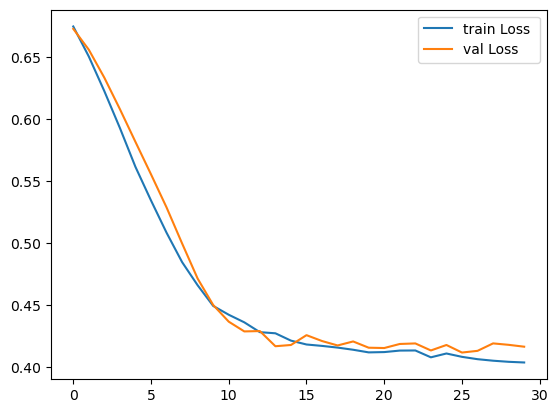

In [8]:
print("Treinamento concluído!")    
plt.plot(history.history['loss'], label='train Loss ')
plt.plot(history.history['val_loss'], label='val Loss')
plt.legend()

In [9]:
print("\n### loss metrics ###")
loss, accuracy_train, preciison_train, recall_train = model.evaluate(X_train, y_train, verbose=0)
print(f"loss train: {loss:.2f}")
print(f"acc train: {accuracy_train:.2f}") 
print(f"prec train: {preciison_train:.2f}") 
print(f"recall train: {recall_train:.2f}")     


### loss metrics ###
loss train: 0.40
acc train: 0.82
prec train: 0.84
recall train: 0.79


In [10]:
print("\n### loss metrics ###")
loss, accuracy_train, preciison_train, recall_train = model.evaluate(X_val, y_val, verbose=0)
print(f"loss train: {loss:.2f}")
print(f"acc train: {accuracy_train:.2f}") 
print(f"prec train: {preciison_train:.2f}") 
print(f"recall train: {recall_train:.2f}")     


### loss metrics ###
loss train: 0.45
acc train: 0.78
prec train: 0.79
recall train: 0.75


In [44]:
import sys
sys.path.append(r'C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\model_deep_learning')
import os
import pickle
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import json
from keras.utils import to_categorical
# from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
import yaml

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.4f}'.format)




In [14]:
yaml_path = r"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\model_deep_learning\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

In [33]:
params = {
        'X_val_feat_sel': os.path.join(
            config['init_path'],
            config['feat_selection']['path'],
            config['feat_selection']['X_val']) ,
        'y_val_feat_sel': os.path.join(
            config['init_path'],
            config['feat_selection']['path'],
            config['feat_selection']['y_val']),
        'reports': os.path.join(
            config['init_path'],
            config['save_reports']['path_reports']),
        'predictions': os.path.join(
            config['init_path'],
            config['output_predict']['path']),
        'model': os.path.join(
            config['init_path'],
            config['model']['path']),
        'model_version': config['model']['model_version']
        }


In [35]:
X_val = pd.read_parquet(params['X_val_feat_sel'])
y_val = pd.read_parquet(params['y_val_feat_sel'])

# y_val = to_categorical(y_val)   

In [36]:
model_path = os.path.join(
        params['model'],
        f"model_{params['model_version']}.h5")

In [37]:
model_path

'C:/Users/gustavo/Documents/Data Science/08-GitHub/Portifolio\\Classification/titanic/model_deep_learning/models\\model_1.h5'

In [38]:
model = keras.models.load_model(model_path)

In [39]:
proba = model.predict(X_val)[:,1]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [26]:
import numpy as np

In [40]:
preds = np.where(proba > 0.5, 1, 0)

In [45]:
    
results = pd.DataFrame(y_val).copy()
results['preds'] = preds
results['proba'] = proba

acc = {}
acc['accuracy'] = accuracy_score(y_val, preds)
acc['f1'] = f1_score(y_val, preds)
acc['recall'] = recall_score(y_val, preds)
acc['precision'] = precision_score(y_val, preds)
acc['roc_auc'] = roc_auc_score(y_val, proba)
    
    
    
    
   

In [46]:
acc

{'accuracy': 0.7982062780269058,
 'f1': 0.6853146853146853,
 'recall': 0.6282051282051282,
 'precision': 0.7538461538461538,
 'roc_auc': 0.851237842617153}